In [ ]:
# %pip install requests
# %pip install opencv-python
# %pip install pillow
# %pip install matplotlib


In [1]:
import requests, base64, json, cv2
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
from PIL import Image

In [2]:
def decode(encoded_img):
    aux_path = 'tmp.png'
    with open(aux_path, "w+") as f:
        f.write(base64.b64decode(encoded_img))
        f.close()

    out = cv2.imread(aux_path)

    return out

## Get the box coordinates, confidence and classes

In [25]:
def resize_to_size(img, size):
    '''
    Resizes the image, so that the shorter side is eqaul to given size,
    keeps the aspect ratio.
    :param img: The image to be resized.
    :param size: The size to resize the image to.
    :return: The resized image.
    '''
    h, w = img.shape[:2]
    if h > w:
        width = size
        dim = (width, int(size* h / w)) 
    else:
        height = size
        dim = (int(size* w/h), height)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return img

In [26]:
API_ENDPOINT = 'https://ni3gvh9foi.execute-api.us-east-1.amazonaws.com/boxes'
image_path = 'Starbucks.jpg'

#Read the image and convert it to a byte array representing png compressed image
img = resize_to_size(cv2.imread(image_path), 640)
is_success, im_buf_arr = cv2.imencode(".jpg", img)
byte_im = im_buf_arr.tobytes()

# Make request to the endpoint and convert it to JSON
r = requests.post(url=API_ENDPOINT, data=byte_im)
response = json.load(BytesIO(r.content))

# Here is the request
response

{'boxes': [[184.2681884765625,
   280.0181579589844,
   380.268310546875,
   439.1288757324219,
   0.9432563781738281,
   42.0]],
 'ratios': {'x': 1.0, 'y': 1.3328125}}

##### sequence of parameters: x1,  y1,  x2,  y2,  confidence,  class ID. 
##### Ratios indicate how the submitted image was scaled before inference.

## Get the image showing the bounding boxes

In [27]:
API_ENDPOINT = 'https://ni3gvh9foi.execute-api.us-east-1.amazonaws.com/image'

image_path = 'Starbucks.jpg'
img = resize_to_size(cv2.imread(image_path), 640)
is_success, im_buf_arr = cv2.imencode(".png", img)
byte_im = im_buf_arr.tobytes()

r = requests.post(url=API_ENDPOINT, data=byte_im)
img_ = Image.open(BytesIO(r.content))

img_to_show = np.asarray(img_)

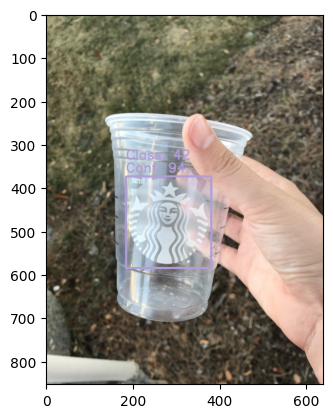

In [28]:
plt.imshow(img_to_show)